
<br>
    The objective of this exercise is that you analyse the code provided and<br>
    make the link with the course. You have to provide a short report that<br>
    comments and analyse the results. You can use directly the results or adapt<br>
    them to you needs.<br>


import the numerical library

In [3]:
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

load the ecg signal

In [4]:
x = np.genfromtxt('ecg.dat')
# sampling frequency of the signal is 500 Hz
fs = 500
# generate correponding time vector
t = np.arange(len(x))/fs


 <br>
    The signal is an ECG signal with visible PQRST complex.  If you zoom on the<br>
    signal plot you can see that there is a 50Hz perturbation due to the power network.<br>
    The objective is to remove this component without altering the PQRST complex.<br>
    Several filtering techniques are used. Comment the advantages and<br>
    disadvantages.<br>



 <br>
    Plot time signal and FFT.<br>
    Q: Comment the figures.<br>


Compute the FFT of the signal

In [5]:
x_fft = np.fft.fft(x)
# Determine the frequency scale
f_fft = np.arange(len(x_fft))/len(x_fft)*fs

plot the signal

(0.0, 70.0)

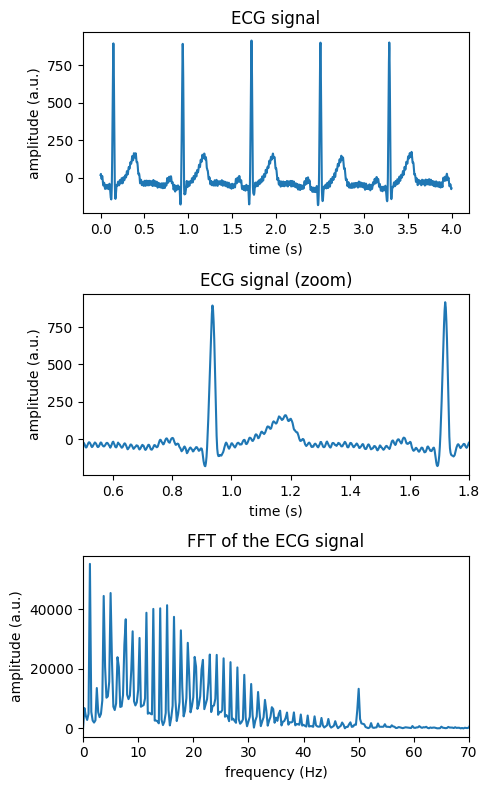

In [6]:
py.figure(1, figsize=[5,8])
py.clf()
py.subplot(3,1,1)
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.subplot(3,1,2)
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal (zoom)')
py.xlim(0.5, 1.8), 
py.subplot(3,1,3)
py.plot(f_fft, abs(x_fft))
py.xlabel('frequency (Hz)')
py.ylabel('amplitude (a.u.)')
py.title('FFT of the ECG signal')
py.tight_layout()
py.xlim(0,70)

**Answer**

In the first figure we see the ECG signal with the distinct PQRST phases, but then zooming in we can clearly see the interference at each 0.02 seconds (50Hz), and this interference makes it hard to distinguish the start of the PQRST (P-point).
And plotting the Fourier transform, we can effectively see in the FFT the presence of the interference from the power grid at 50 Hz. The goal is to filter out this noise without distorting the important parts of the ECG (PQRST).
We can apply a band stop filter in order to remove the frequency at 50Hz. But we see that most of the energy of the signal is located before 35Hz and therefore we can understand the choice of taking 35Hz as the start frquency of the bandstop (see next point). 


 <br>
    IIR filter:<br>
    Define a filter with a pass-band up to 35 Hz and a stop band from 50Hz.<br>
    Maximum attenuation in passband 3 dB<br>
    Minimum attenuation in stopband 40 dB<br>
    Q: Comment the results (distorsion of the PQRST, delay, ...)<br>
    Q: Based on the FFT spectrum comment the selection of the pass and stop band<br>
       frequencies.<br>


Analogic limit of the passband frequency

In [7]:
f_pass = 42
# Analogic limit of the stopband frequency
f_stop = 50
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn)
# Filter the signal
x_f = sp.lfilter(b ,a, x)

(0.5, 1.8)

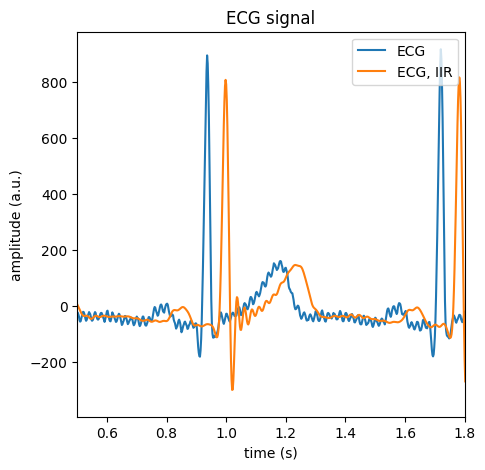

In [8]:
py.figure(2, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, IIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)

**Answer**

With the IIR filter, we see that there is a shift in phase delay (Time Delay) and small distortion of the ECG Signal (S point) but the frequencies at 50Hz are attenuated. A narrower stop band or the use of a different filtering technique, for example a zero-phase IIR filter, might reduce the delay and preserve the integrity of the PQRST complex.
Additionnaly we can quickly comment the choice of 35Hz, we decide to adjust it but taking smaller bandstop we create an overshooted filtered signal and we distort even more the signal.  


 <br>
    IIR filter (zero phase):<br>
    Use the same filter but apply a zero phase approach.<br>
    Q: Comment the results (distorsion of the PQRST, delay, ...)<br>


Filter the signal

In [9]:
x_f = sp.filtfilt(b ,a, x)

(0.5, 1.8)

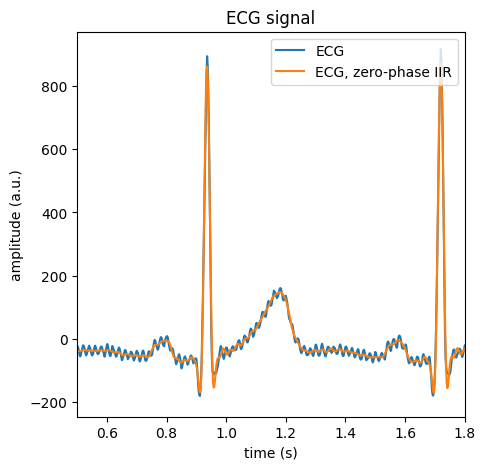

In [10]:
py.figure(3, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, zero-phase IIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)

**Answer**

We obtain a very accurate filtered signal with the zero-phase IIR filter compared to the previous IIR filter. It successfully removes the unwanted 50Hz frequency and we see really small distortion for the ECG (always for S-point). But this can be due to the 50Hz oscillations that we removed and also with the frequencies that were deleted between 35Hz and 50Hz. Hence, we obtain a filtered signal that shows us clearly the PQRST of the ECG signal, and this time without phase delay. This makes it an ideal filtering choice for ECG signals.


<br>
    Linear phase FIR filter.<br>
    Define a FIR filter with the same properties.<br>
    Q: Comment the results (distorsion of the PQRST, delay, ...).<br>


length of the filter

In [11]:
l_fir = 101
# compute the filter coefficients using least square approach
b = sp.firls(l_fir, [0, f_pass_N, f_stop_N, 1], [1, 1, 1/100, 1/100])
a = [1]
# filter the signal
x_f = sp.lfilter(b, a, x)

(0.5, 1.8)

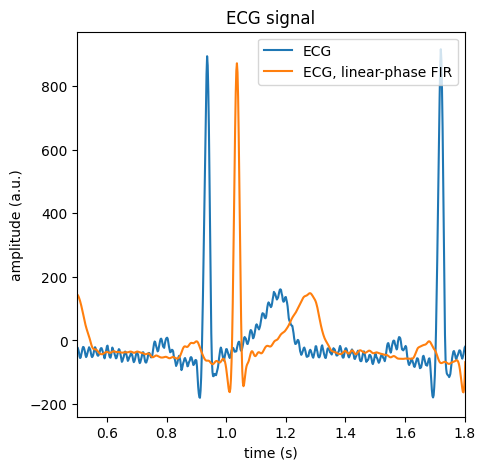

In [12]:
py.figure(4, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, linear-phase FIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)

**Answer**

This time, the results are worse. Despite the FIR filter successfully removing the 50 Hz interference, it introduces a phase delay. As a consequence, the ECG signal is distorted and does not correspond to the correct ECG signal anymore.